In [1]:
#Name:      Shoaib A Sheikh
#Email:     Sheikh.A.Shoaib@Gmail.com
#Phone:     (786) 554-9310
#Web:       https://github.com/ShobyP/Portfolio
#LinkedIn:  www.linkedin.com/in/shoaib-sheikh

In [2]:
#Importing essential libraries:

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
#importing provided data file.
#screenOrders dataframe will be the main dataframe, that will be used as a source dataframe.

screenOrders = pd.read_csv('screening_exercise_orders_v201810.csv')

In [4]:
#peeking into the file for info

screenOrders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13471 entries, 0 to 13470
Data columns (total 5 columns):
customer_id         13471 non-null int64
gender              13471 non-null int64
date                13471 non-null object
value               13471 non-null float64
predicted_gender    13471 non-null int64
dtypes: float64(1), int64(3), object(1)
memory usage: 473.6+ KB


In [5]:
#peeking into the file for data summaries.

screenOrders.describe()

,customer_id,gender,value,predicted_gender
count,13471.000000,13471.000000,13471.000000,13471.000000
mean,5033.693564,0.498256,357.322179,0.642788
std,2500.179222,0.500016,387.210821,0.479196
min,1000.000000,0.000000,0.000000,0.000000
25%,2890.500000,0.000000,161.200000,0.000000
50%,4850.000000,0.000000,258.000000,1.000000
75%,7157.000000,1.000000,426.000000,1.000000
max,9813.000000,1.000000,8046.300000,1.000000


In [6]:
# A) Assemble a dataframe with one row per customer and the following columns:
#    * customer_id
#    * gender
#    * most_recent_order_date
#    * order_count (number of orders placed by this customer)
#    Sort the dataframe by customer_id ascending and display the first 10 rows.

In [7]:
#Plan of attack:

#Creat a new dataframe, GroupedData, by extracting data from screenOrders.
#sort dataframe by customer_id
#Add a gender column in GroupedData dataframe by importing data from main dataframe.

#Creat a new dataframe, custOrder, by using data from main dataframe.
#reduce custOrder to show only customer id and most recent order date.

#Finally merge custOrder data to GroupedData
#Sort GroupedData values by customer_id
#Show results.

In [8]:
#Creating a new dataframe, GroupedData, by extracting data from screenOrders.
#the new dataframe will only have customer_id and order_count, as instructed.

GroupedData = screenOrders['customer_id'].value_counts().reset_index(name='order_count').rename(columns={'index': 'customer_id'})

In [9]:
#sorting dataframe by customer_id

GroupedData.sort_values('customer_id', inplace = True)

#checking if dataframe is in order.

GroupedData.head()

,customer_id,order_count
4072,1000,1
5098,1001,1
508,1002,3
467,1003,4
7322,1004,1


In [10]:
#Adding a gender column in GroupedData dataframe by importing data from main dataframe. 

GroupedData['gender'] = screenOrders['gender']

#checking if GroupedData is as expected.

GroupedData.head()

,customer_id,order_count,gender
4072,1000,1,0
5098,1001,1,0
508,1002,3,1
467,1003,4,0
7322,1004,1,1


In [11]:
#creating a new dataframe, custOrder, by using data from main dataframe.
#custOrder will be formatted in the following fashion:

# Date: sorted in descending order such that, column 0 will have the most recent date. 
# the date will decrease as column number increases
 

custOrder = screenOrders.sort_values("date", ascending=False).groupby("customer_id")["date"].apply(list).apply(pd.Series).reset_index()

#checking if custOrder looks as expected.

custOrder.head()

,customer_id,0,1,2,3,4,5,6,7,8,...,15,16,17,18,19,20,21,22,23,24
0,1000,2017-01-01 00:11:31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1001,2017-01-01 00:29:56,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1002,2017-02-19 21:35:31,2017-01-23 04:33:38,2017-01-01 01:30:31,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1003,2017-04-26 02:37:20,2017-04-25 09:54:54,2017-01-20 05:56:10,2017-01-01 01:34:22,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1004,2017-01-01 03:11:54,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
#reducing custOrder to show only customer id and most recent order date.

custOrder = custOrder[["customer_id", 0]]
custOrder.columns = ["customer_id", "most_recent_order_date"]

#Checking how custOrder looks like.

custOrder.head()

,customer_id,most_recent_order_date
0,1000,2017-01-01 00:11:31
1,1001,2017-01-01 00:29:56
2,1002,2017-02-19 21:35:31
3,1003,2017-04-26 02:37:20
4,1004,2017-01-01 03:11:54


In [13]:
#Finally merging custOrder data to GroupedData

GroupedData = GroupedData.merge(custOrder,on='customer_id',how='inner')

#Sorting GroupedData values by customer_id

GroupedData = GroupedData.sort_values('customer_id')

In [14]:
#Showing top 10 values of GroupedData dataframe.

GroupedData.head(10)

,customer_id,order_count,gender,most_recent_order_date
0,1000,1,0,2017-01-01 00:11:31
1,1001,1,0,2017-01-01 00:29:56
2,1002,3,1,2017-02-19 21:35:31
3,1003,4,0,2017-04-26 02:37:20
4,1004,1,1,2017-01-01 03:11:54
5,1005,2,0,2017-12-16 01:39:27
6,1006,3,1,2017-05-09 15:27:20
7,1007,1,1,2017-01-01 15:59:50
8,1008,3,0,2017-12-17 05:47:48
9,1009,1,0,2017-01-01 19:27:17


In [15]:
# B) Plot the count of orders per week.

In [16]:
# Plan of attack:

# Clone the main dataframe as ordersPerWeek.
# Add a week column to ordersPerWeek dataframe 
# Plot a countplot for orders per week. 

In [17]:
#Cloning the main dataframe as ordersPerWeek.

ordersPerWeek = screenOrders

In [18]:
# Adding a week column to ordersPerWeek dataframe 

ordersPerWeek['week'] = pd.to_datetime(screenOrders['date']).dt.strftime('%W')

#Checking ordersPerWeek after week column addition.

ordersPerWeek.head(5)

,customer_id,gender,date,value,predicted_gender,week
0,1000,0,2017-01-01 00:11:31,198.5,1,00
1,1001,0,2017-01-01 00:29:56,338.0,1,00
2,1002,1,2017-01-01 01:30:31,733.0,1,00
3,1003,1,2017-01-01 01:34:22,772.0,1,00
4,1004,0,2017-01-01 03:11:54,508.0,1,00


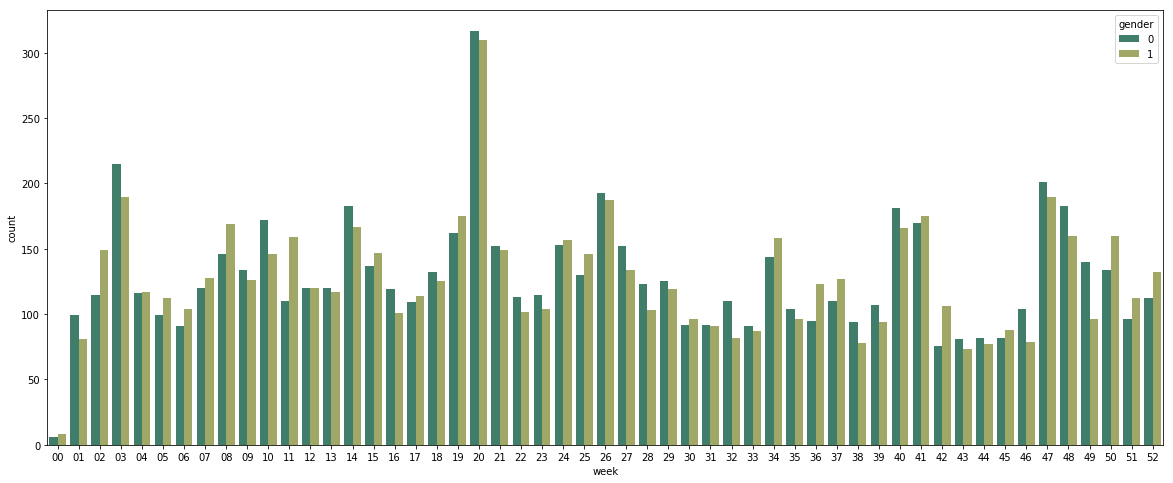

In [19]:
#plotting a countplot for orders per week. also added hue for gender detail.

plt.figure(figsize=(20,8))
sns.countplot(ordersPerWeek['week'], hue = ordersPerWeek['gender'], palette = 'gist_earth')

In [20]:
# C) Compute the mean order value for gender 0 and for gender 1.

In [21]:
# Plan of attack:

# creat a mean "group by" object by taking data from main dataframe. 
# sum, group and then divide tbe mean dataframe by number of entries per gender.
# calculate the difference of values in percentage, between gender 0 and 1.


In [22]:
#creating a mean "group by" object by taking data from main dataframe, summing and grouping and then dividing by counts.
#this will result in mean values.

mu = screenOrders.groupby(['gender']).sum()/screenOrders.groupby(['gender']).count()

#Checking how mean object looks like.

mu.head()

,customer_id,date,predicted_gender,value,week
gender,,,,,
0,5032.640331,NaN,0.504513,363.890006,NaN
1,5034.754172,NaN,0.782032,350.708361,NaN


In [23]:
# calculating the difference of values in percentage, between gender 0 and 1

100 - (mu.iloc[1]['value']/mu.iloc[0]['value'])*100

3.6224256119812566

In [24]:
# On average. Gender 1 spent 3.6% less than Gender 0. 
# It appears that the product is targetting both genders equally and difference is within margin of error.

In [25]:
#D) Assuming a single gender prediction was made for each customer, generate a confusion matrix for predicted gender. 
# What does the confusion matrix tell you about the quality of the predictions?

from sklearn.metrics import confusion_matrix, classification_report

In [26]:
print (confusion_matrix(screenOrders['gender'], screenOrders['predicted_gender']))

[[3349 3410]
 [1463 5249]]


In [27]:
#for gender prediction: 
#predicted 0 and actual 0 are 3349. (true negatives)
#predicted 1 and actual 1 are 5249. (true positives)
#predicted 0 and actual 1 are 1463. (false negatives)
#predicted 1 and actual 0 are 3410. (false positive)

In [28]:
#Classification report for precision and recall.

print (classification_report(screenOrders['gender'], screenOrders['predicted_gender']))

              precision    recall  f1-score   support

           0       0.70      0.50      0.58      6759
           1       0.61      0.78      0.68      6712

   micro avg       0.64      0.64      0.64     13471
   macro avg       0.65      0.64      0.63     13471
weighted avg       0.65      0.64      0.63     13471



In [29]:
# E) Describe one of your favorite tools or techniques and give a small example of how it's helped you solve a problem. 
#    Limit your answer to one paragraph.

In [30]:
# I have tried quite a few frameworks and tools, that include but not limited to Scikit-learn, TensorFlow and pySpark. 
# Using said frameworks, I completed several projects which can be found on my github portfolio, link is provided in header.
# I would like to discuss a NLP project on Yelp rating, from my portfolio projects. the project used multinomial Naive bayes,
# CountVectorizer and tfidfTransformer. 
# In that project I really enjoyed using pipeline feature from sklearn. I was quickly able to create a pipeline and summerize
# about 10 steps in 1. 
# I used the following convention:

# pipeline1 = Pipeline ([
#     ('cv', CountVectorizer()),
#     ('tfidf', TfidfTransformer()),
#     ('Classifier',MultinomialNB()) 
# ])

# this feature really wow-ed me because it allowed me to create a kind of recipe to solve a specific problem based
# on tested solution steps.